# Cross validation

k-Fold Cross-Validation. Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample. The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into.

In [9]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [5]:
iris = load_iris()

In [6]:
X = iris.data
y = iris.target 

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 4)

In [14]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
metrics.accuracy_score(y_pred, y_test)

0.9736842105263158

## Applylying Kfold cross validation 

In [17]:
from sklearn.model_selection import KFold

### Compairing CrossValidation to train/test split

#### Advantage 
* Creates more accurate estimate out of sample accuracy 

* More efficient use of data 
k can be any number but k =10 is recomemded generally

In [19]:
from sklearn.model_selection import cross_val_score

In [21]:
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y,cv=10, scoring='accuracy')
print(scores)

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]


In [22]:
scores.mean()

0.9666666666666668

In [28]:
k_range = range(1,26)
kscore = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    kscore.append(scores.mean())
kscore

[0.96,
 0.9533333333333334,
 0.9666666666666666,
 0.9666666666666666,
 0.9666666666666668,
 0.9666666666666668,
 0.9666666666666668,
 0.9666666666666668,
 0.9733333333333334,
 0.9666666666666668,
 0.9666666666666668,
 0.9733333333333334,
 0.9800000000000001,
 0.9733333333333334,
 0.9733333333333334,
 0.9733333333333334,
 0.9733333333333334,
 0.9800000000000001,
 0.9733333333333334,
 0.9800000000000001,
 0.9666666666666666,
 0.9666666666666666,
 0.9733333333333334,
 0.96,
 0.9666666666666666]

Text(0, 0.5, 'accuracy using cross validation')

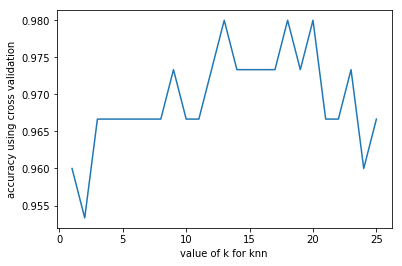

In [29]:
#graphical visualisation
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(k_range, kscore)
plt.xlabel('value of k for knn')
plt.ylabel('accuracy using cross validation')

### Model Selection 

In [31]:
#10 fold cross validation with best knnmodel
knn = KNeighborsClassifier(n_neighbors=20)
score = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
score.mean()

0.9800000000000001

In [39]:
# 10fold cross validation with logistic regression 
logreg = LogisticRegression(solver='liblinear', multi_class='auto')
scorl = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
scorl.mean()

0.9533333333333334